In [1]:
import numpy as np

# Feed NSR exports into Pisces' MO evaluation loop

In [25]:
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt

from analyses.NHRC.nhrc_utils.analysis import SCENARIOS


specgram_folder = Path('/Users/eric/Engineering/Work/pisces/data_sets/specgrams')

specgram_data = defaultdict(dict)

scenarios = SCENARIOS
print(scenarios)

for file in specgram_folder.joinpath('NSR').glob('*.npy'):
    print(file)
    scenario, subject_id = file.stem.split('_')[:2]
    print(scenario, ":", subject_id)
    specgram_data[scenario][subject_id] = np.squeeze(np.load(file, allow_pickle=True))

['stationary', 'hybrid']
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/hybrid_1818471_spectrogram.npy
hybrid : 1818471
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/stationary_844359_spectrogram.npy
stationary : 844359
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/stationary_3997827_spectrogram.npy
stationary : 3997827
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/stationary_781756_spectrogram.npy
stationary : 781756
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/stationary_8530312_spectrogram.npy
stationary : 8530312
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/hybrid_9961348_spectrogram.npy
hybrid : 9961348
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/hybrid_5797046_spectrogram.npy
hybrid : 5797046
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/stationary_5797046_spectrogram.npy
stationary : 5797046
/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/stationary_4634

In [26]:
specgram_data.keys()

dict_keys(['hybrid', 'stationary'])

In [27]:
keys = specgram_data['stationary'].keys()

In [28]:
from analyses.NHRC.nhrc_utils.analysis import prepare_data

sets_prepro_data = defaultdict(dict)

for set_name in scenarios:
    print("Loading", set_name)
    sets_prepro_data[set_name] = np.load(f'./pre_processed_data/{set_name}/{set_name}_preprocessed_data.npy', allow_pickle=True).item()

walch_data_bundle = prepare_data(sets_prepro_data['stationary'])
hybrid_data_bundle = prepare_data(sets_prepro_data['hybrid'])

Loading stationary
Loading hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


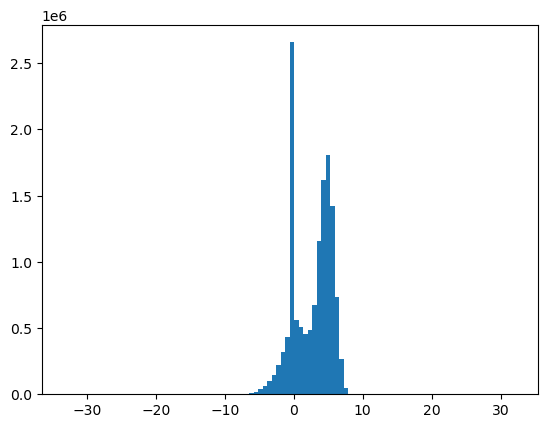

In [29]:
_  = plt.hist((walch_data_bundle.spectrogram.numpy() - hybrid_data_bundle.spectrogram.numpy()).ravel(), bins=100)

In [30]:
nsr_stationary = np.array([specgram_data['stationary'][subject_id] for subject_id in keys])
nsr_hybrid = np.array([specgram_data['hybrid'][subject_id] for subject_id in keys])

In [31]:
h = np.load('/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/hybrid_1066528_spectrogram.npy')
s = np.load('/Users/eric/Engineering/Work/pisces/data_sets/specgrams/NSR/stationary_1066528_spectrogram.npy')

In [32]:
np.sum(h == s) / np.prod(h.shape)

0.08141072591145833

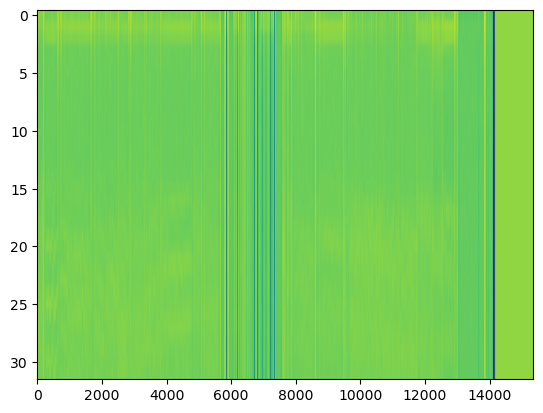

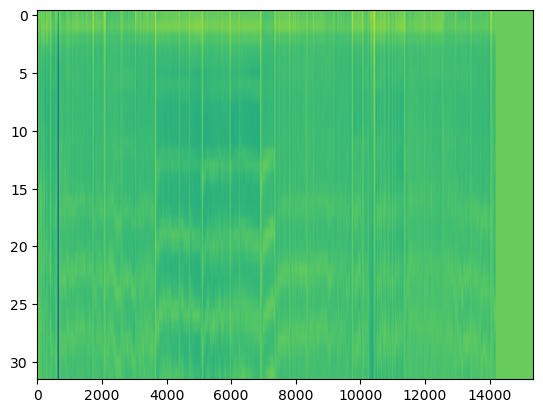

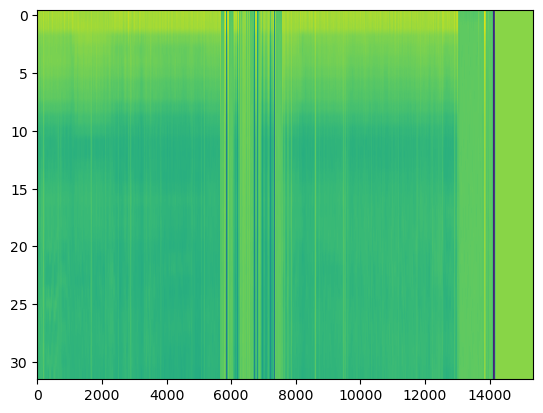

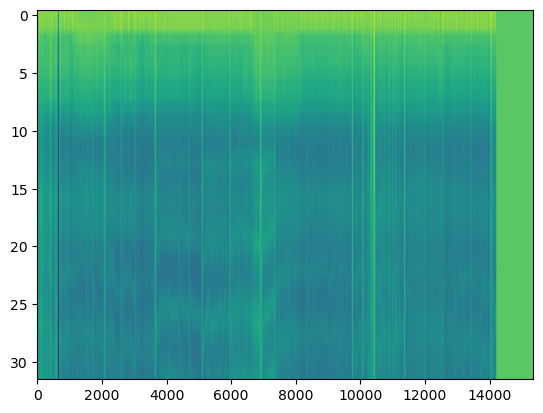

In [33]:
for array in [s, nsr_stationary[0], h, nsr_hybrid[0]]:
    array = np.squeeze(array)
    plt.imshow(array.T, aspect='auto')
    plt.show()

In [34]:
nsr_stationary.shape, nsr_hybrid.shape

((30, 15360, 32), (30, 15360, 32))

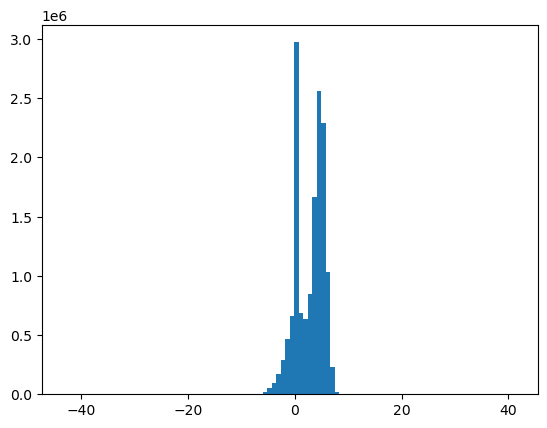

In [35]:
_  = plt.hist((nsr_stationary - nsr_hybrid).ravel(), bins=100)

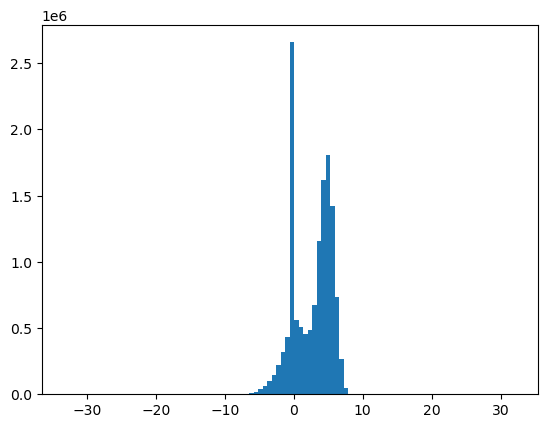

In [36]:
_  = plt.hist((walch_data_bundle.spectrogram.numpy() - hybrid_data_bundle.spectrogram.numpy()).ravel(), bins=100)

In [37]:
missed_keys = 0
rev_sets_prepro = sets_prepro_data
for key in rev_sets_prepro.keys():
    pisces_prepro = rev_sets_prepro[key]
    nsr_prepro = specgram_data.get(key)

    if nsr_prepro is None:
        print("No NSR data for", key)
        continue

    print("Processing", key)

    for iden in pisces_prepro.keys():
        print("key:", iden)
        diff = rev_sets_prepro[key][iden]['spectrogram'] - nsr_prepro[iden]
        # print(f"Diff: [{diff.min()}, {diff.max()}], μ: {diff.mean()}")
        if iden not in nsr_prepro.keys():
            missed_keys += 1
            print("Missing", iden, "from NSR", key)
            continue
        rev_sets_prepro[key][iden]['spectrogram.backup'] = rev_sets_prepro[key][iden]['spectrogram']
        rev_sets_prepro[key][iden]['spectrogram'] = nsr_prepro[iden]
print(iden)
diff = rev_sets_prepro['stationary'][iden]['spectrogram'] - rev_sets_prepro['hybrid'][iden]['spectrogram']
print(f"Diff: [{diff.min()}, {diff.max()}], μ: {diff.mean()}")
    


Processing stationary
key: 1066528
key: 1360686
key: 1449548
key: 1455390
key: 1818471
key: 2598705
key: 2638030
key: 3509524
key: 3997827
key: 4018081
key: 4314139
key: 4426783
key: 46343
key: 5132496
key: 5498603
key: 5797046
key: 6220552
key: 759667
key: 781756
key: 8000685
key: 8173033
key: 844359
key: 8530312
key: 8686948
key: 8692923
key: 9106476
key: 9618981
key: 9961348
Processing hybrid
key: 1066528
key: 1360686
key: 1449548
key: 1455390
key: 1818471
key: 2598705
key: 2638030
key: 3509524
key: 3997827
key: 4018081
key: 4314139
key: 4426783
key: 46343
key: 5132496
key: 5498603
key: 5797046
key: 6220552
key: 759667
key: 781756
key: 8000685
key: 8173033
key: 844359
key: 8530312
key: 8686948
key: 8692923
key: 9106476
key: 9618981
key: 9961348
9961348
Diff: [-12.228557586669922, 7.592806816101074], μ: 1.9718892574310303


In [38]:

import pandas as pd
import tensorflow as tf
from analyses.NHRC.nhrc_utils.analysis import DF_COLUMNS, WASA_SLEEP_ACCURACY, auroc_balaccuracy_wasa
from analyses.NHRC.nhrc_utils.model_definitions import cnn_pred_proba, lr_cnn_pred_proba, naive_pred_proba


# rev_sets = reverse_dicts(rev_sets_prepro)
rev_sets = sets_prepro_data

hybrid_preprocessed_data = rev_sets['hybrid']
walch_preprocessed_data = rev_sets['stationary']

walch_keys = list(walch_preprocessed_data.keys())

cnn_predictors = [
    tf.keras.models.load_model(f"/Users/eric/Engineering/Work/pisces/analyses/NHRC/evaluations/models/finetuning_{i}.keras")
    for i in walch_keys 
]

lr_predictors = [
    tf.keras.models.load_model(f"/Users/eric/Engineering/Work/pisces/analyses/NHRC/evaluations/models/lr_{i}.keras")
    for i in walch_keys 
]

model_types = ['naive', 'finetuning', 'lr']

hybrid_data_bundle = prepare_data(hybrid_preprocessed_data)
walch_data_bundle = prepare_data(walch_preprocessed_data)
evals = {s: 
    {m: [] for m in model_types} 
    for s in scenarios 
}

evaluations_df = pd.DataFrame(columns=DF_COLUMNS)

for test_idx in range(len(hybrid_preprocessed_data)):
    # extract inputs
    stationary_weights = walch_data_bundle.sample_weights[test_idx].numpy()
    stationary_labels = walch_data_bundle.true_labels[test_idx].numpy()
    stationary_labels_masked = np.where(stationary_weights, stationary_labels, 0)
    stationary_wldm_predictions = walch_data_bundle.mo_predictions[test_idx].numpy()
    stationary_lr_input = walch_data_bundle.activity[test_idx].numpy()

    hybrid_wldm_predictions = hybrid_data_bundle.mo_predictions[test_idx].numpy()
    hybrid_lr_input = hybrid_data_bundle.activity[test_idx].numpy()

    # z-normalize input data
    stationary_lr_input = (stationary_lr_input - np.mean(stationary_lr_input)) / np.std(stationary_lr_input)
    hybrid_lr_input = (hybrid_lr_input - np.mean(hybrid_lr_input)) / np.std(hybrid_lr_input)


    # process inputs into predictions
    stationary_naive = naive_pred_proba(stationary_wldm_predictions)
    stationary_lr = lr_cnn_pred_proba(
            lr_predictors[test_idx], 
            stationary_lr_input)
    stationary_cnn = cnn_pred_proba(
            cnn_predictors[test_idx], 
            stationary_wldm_predictions)
    hybrid_naive = naive_pred_proba(hybrid_wldm_predictions)
    hybrid_cnn = cnn_pred_proba(
            cnn_predictors[test_idx],
            hybrid_wldm_predictions)
    hybrid_lr = lr_cnn_pred_proba(
            lr_predictors[test_idx],
            hybrid_lr_input)
    
    eval_dict = {
        "stationary_naive": stationary_naive,
        "stationary_finetuning": stationary_cnn,
        "stationary_lr": stationary_lr,
        "hybrid_naive": hybrid_naive,
        "hybrid_finetuning": hybrid_cnn,
        "hybrid_lr": hybrid_lr
    }

    for model in model_types:
        print(model)
        for scenario in scenarios:
            print("=>", scenario)
            evals[scenario][model] = auroc_balaccuracy_wasa(
                walch_keys[test_idx], 
                eval_dict[f'{scenario}_{model}'],
                stationary_weights,
                stationary_labels_masked,
                sleep_accuracy=WASA_SLEEP_ACCURACY)

    # now append each evaluation to the dataframe, labeled correctly
    evaluations_df = pd.concat([evaluations_df,
                                pd.DataFrame([
            [walch_keys[test_idx],
            scenario,
            model,
            *evals[scenario][model][i],
            int(100 * WASA_SLEEP_ACCURACY[i]),
            ]
            for scenario in scenarios for model in model_types
            for i in range(len(WASA_SLEEP_ACCURACY))
        ], columns=DF_COLUMNS
    )], ignore_index=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
naive
=> stationary
=> hybrid
finetuning
=> stationary
=> hybrid
lr
=> stationary
=> hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
naive
=> stationary
=> hybrid
finetuning
=> stationary
=> hybrid
lr
=> stationary
=> hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/var/folders/h4/pg7xmblx74zbp2yhls4bc_mh0000gn/T/ipykernel_59837/4234280725.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluations_df = pd.concat([evaluations_df,


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
naive
=> stationary
=> hybrid
finetuning
=> stationary
=> hybrid
lr
=> stationary
=> hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
naive
=> stationary
=> hybrid
finetuning
=> stationary
=> hybrid
lr
=> stationary
=> hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
naive
=> stationary
=> hybrid
finetuning
=> stationary
=> hybrid
lr
=> stationary
=> hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
naive
=> stationary
=> hybrid
finetuning
=> stationary
=> hybrid
lr
=> stationary
=> hybrid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms

In [39]:
from pisces.data_sets import DataSetObject

data_location = Path('/Users/eric/Engineering/Work/pisces/data_sets')

found_sets = DataSetObject.find_data_sets(data_location)
stationary_base = found_sets['walch_et_al']
hybrid_base = found_sets['hybrid_motion']

stationary_base.parse_data_sets()
hybrid_base.parse_data_sets()

In [40]:
s0_id = stationary_base.ids[0]

s0_acc = stationary_base.get_feature_data('accelerometer', s0_id)
h0_acc = hybrid_base.get_feature_data('accelerometer', s0_id)

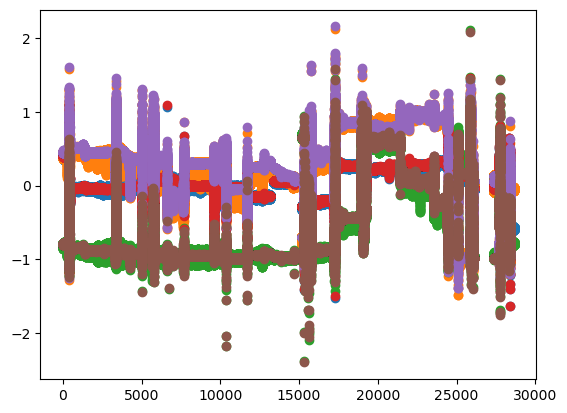

In [41]:
plt.plot(h0_acc[:, 0], h0_acc[:, 1:], 'o')
plt.plot(s0_acc[:, 0], s0_acc[:, 1:], 'o')

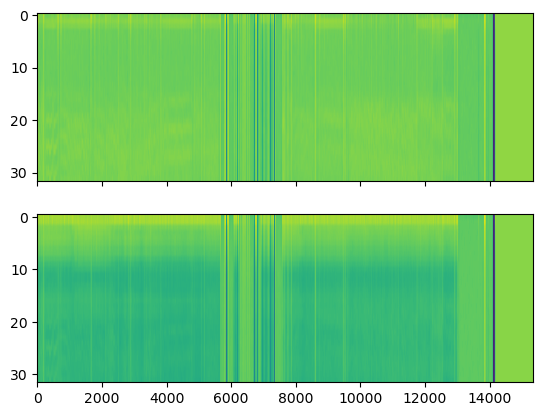

In [42]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].imshow(walch_data_bundle.spectrogram[0].numpy().T, aspect='auto')
ax[1].imshow(hybrid_data_bundle.spectrogram[0].numpy().T, aspect='auto')

In [43]:
(walch_data_bundle.mo_predictions[0].numpy().T - hybrid_data_bundle.mo_predictions[0].numpy().T).std()

0.19171292

# It's the spectrograms
Specifically, the accelerometer resampling between NSR and pisces seems to be introducing differences! The Pisces-era eval loop below will discover the same outlier behavior as we saw in NSR.

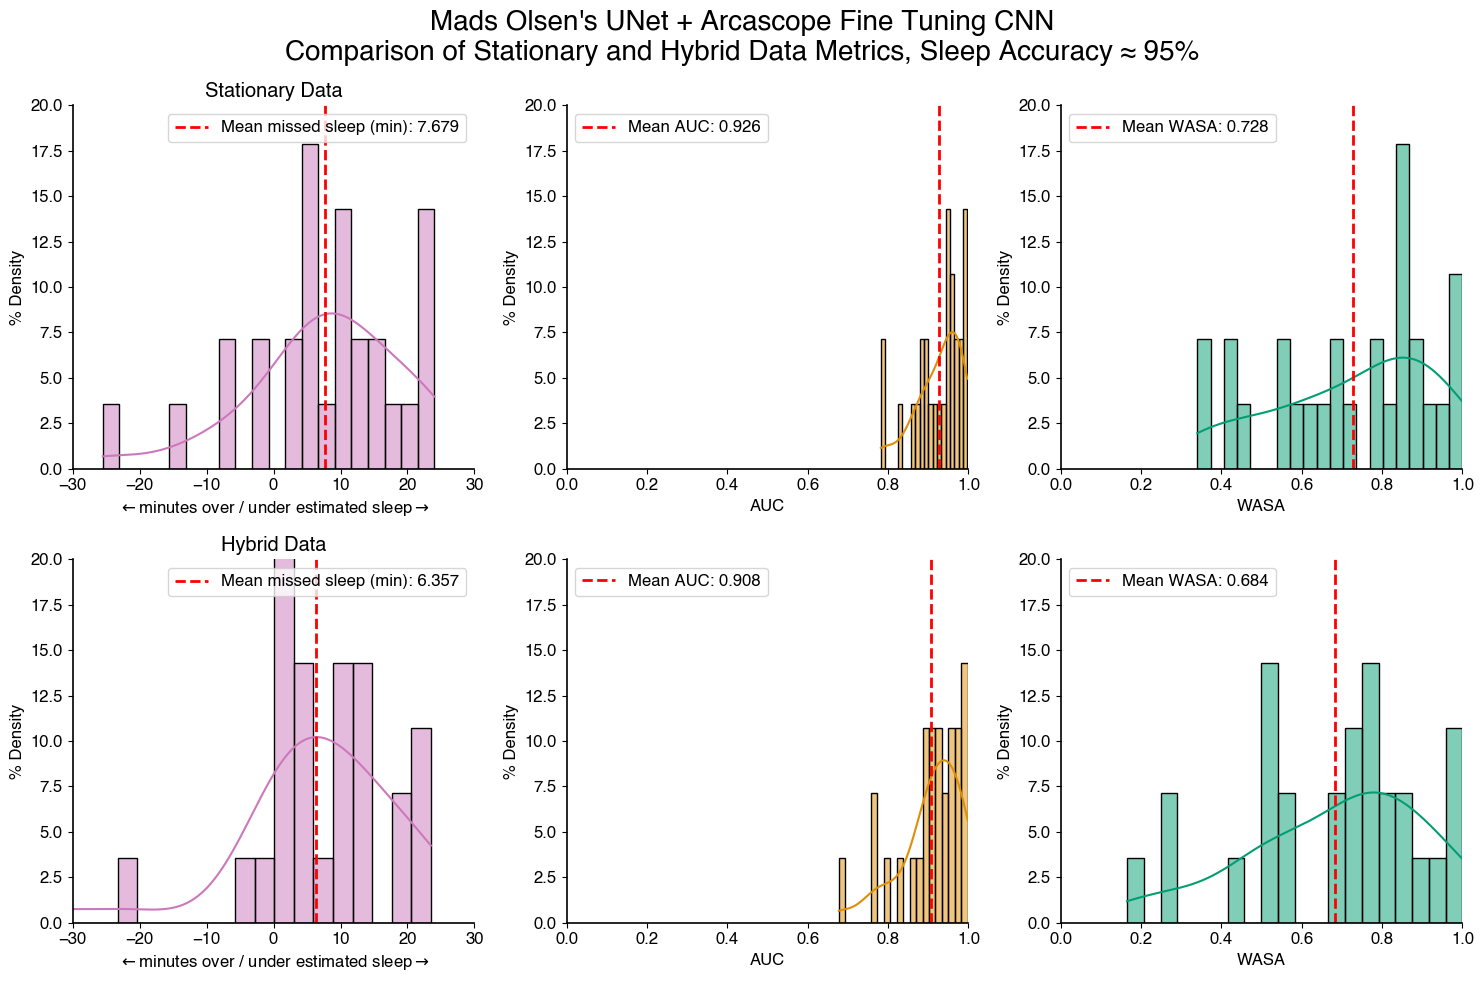

In [44]:
from analyses.NHRC.nhrc_utils.analysis import DEFAULT_EVALUATION_DIR, SCENARIOS, STATIONARY_LOWER, HYBRID_LOWER
import matplotlib.pyplot as plt
from analyses.NHRC.nhrc_utils.analysis import ACCURACY_COLUMN, AUROC_COLUMN, MODEL_COLUMN, SCENARIO_COLUMN, SLEEP_ACCURACY_COLUMN, WASA_COLUMN
from analyses.NHRC.nhrc_utils.plotting import tri_plot_metrics
from analyses.NHRC.nhrc_utils.model_definitions import EXTRA_LAYERS_NAME, EXTRA_LOWER, LR_LOWER, NAIVE_LOWER


WASA_SLEEP_PERCENT = 95
STATIONARY_SET_NAME = "Stationary Data"
HYBRID_SET_NAME = "Hybrid Data"
SECOND_LINE = f"Sleep Accuracy ≈ {WASA_SLEEP_PERCENT}%"
SECOND_TITLE_LINE = f"Comparison of Stationary and Hybrid Data Metrics, {SECOND_LINE}"
TRIPLOT_DPI = 300



fig, axs = plt.subplots(2, 3, figsize=(15, 10))

cnn_evaluations_df = evaluations_df[evaluations_df[MODEL_COLUMN] == EXTRA_LOWER]
cnn_evaluations_df = cnn_evaluations_df[cnn_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
cnn_stationary = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
cnn_hybrid = cnn_evaluations_df[cnn_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

for ax in axs.flatten():
    ax.set_ylim(0, 20)

tri_plot_metrics(evaluations_df=cnn_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(cnn_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)


fig.suptitle(f"Mads Olsen's UNet + Arcascope {EXTRA_LAYERS_NAME} CNN\n{SECOND_TITLE_LINE}", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{EXTRA_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

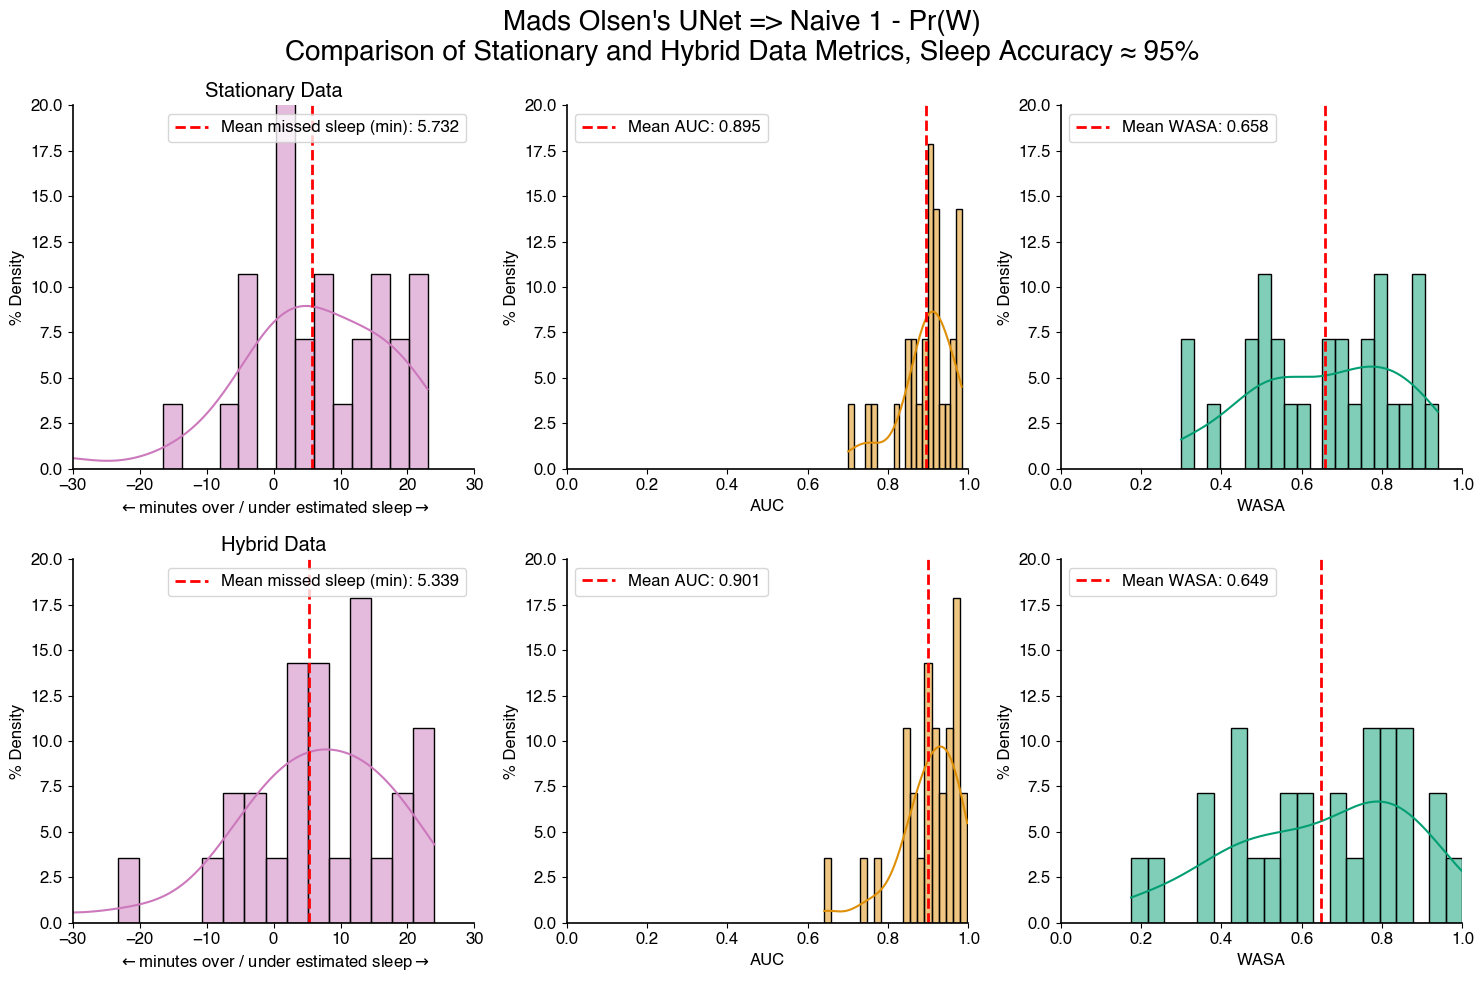

In [45]:


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

naive_evaluations_df = evaluations_df[evaluations_df[MODEL_COLUMN] == NAIVE_LOWER]
naive_evaluations_df = naive_evaluations_df[naive_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
naive_stationary = naive_evaluations_df[naive_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
naive_hybrid = naive_evaluations_df[naive_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

tri_plot_metrics(naive_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME, 
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(naive_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME, 
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
for ax in axs.flatten():
    ax.set_ylim(0, 20)

fig.suptitle(f"Mads Olsen's UNet => Naive 1 - Pr(W)\n{SECOND_TITLE_LINE}", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{NAIVE_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')

## Tri plot for logistic regression CNN

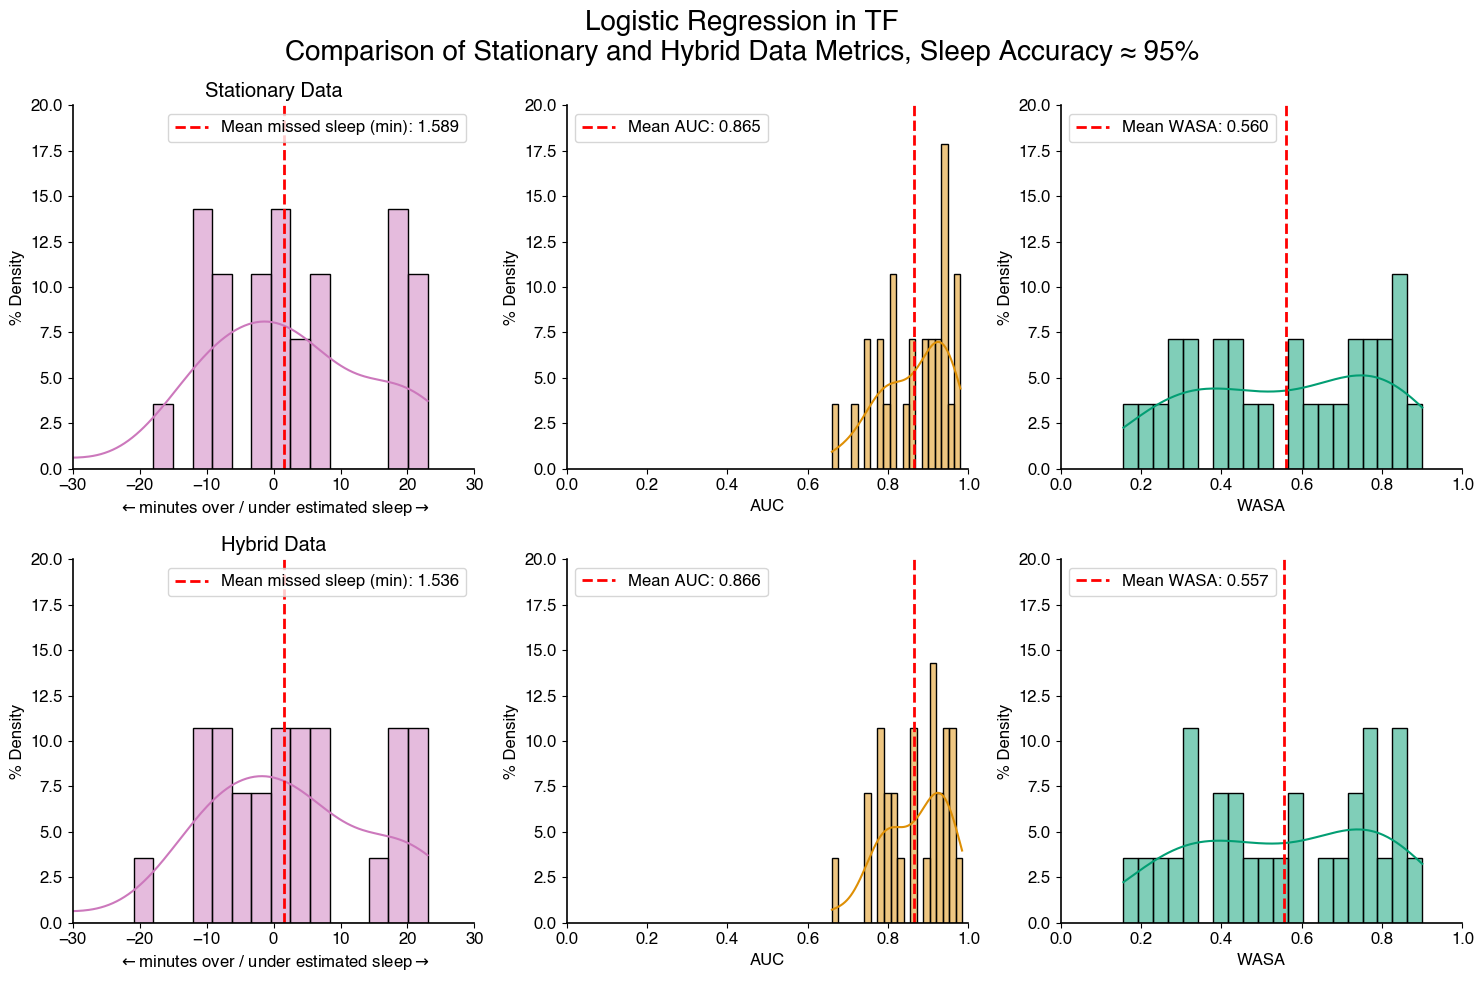

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

lr_evaluations_df = evaluations_df[evaluations_df[MODEL_COLUMN] == LR_LOWER]
lr_evaluations_df = lr_evaluations_df[lr_evaluations_df[SLEEP_ACCURACY_COLUMN] == WASA_SLEEP_PERCENT]
lr_stationary = lr_evaluations_df[lr_evaluations_df[SCENARIO_COLUMN] == STATIONARY_LOWER]
lr_hybrid = lr_evaluations_df[lr_evaluations_df[SCENARIO_COLUMN] == HYBRID_LOWER]

tri_plot_metrics(lr_stationary, axs=axs[0], axs_set_name=STATIONARY_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)
tri_plot_metrics(lr_hybrid, axs=axs[1], axs_set_name=HYBRID_SET_NAME,
                 wasa_column=WASA_COLUMN, accuracy_column=ACCURACY_COLUMN, auroc_column=AUROC_COLUMN)

for ax in axs.flatten():
    ax.set_ylim(0, 20)

fig.suptitle(f"Logistic Regression in TF\n{SECOND_TITLE_LINE}", fontsize=20)

fig.tight_layout()
fig.savefig(DEFAULT_EVALUATION_DIR.joinpath(f"{LR_LOWER}_triplot_{WASA_SLEEP_PERCENT}.png"), dpi=TRIPLOT_DPI, bbox_inches='tight')